In [1]:
%pylab inline
import pickle
import seaborn as sns
import pandas as pd
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [2]:
(all_cjs, all_txids, processed, failures) = pickle.load(open('cjs.p.bak','rb'))
cjs = pd.DataFrame(all_cjs, columns=["height", "n_vin", "n_vout", "cj_value", "cj_part", "max_out", "min_out", "op_r", "wasabi"])
cjs.height = cjs.height.astype(np.int32)
cjs.n_vin = log10(cjs.n_vin.astype(np.int32))
cjs.n_vout = log10(cjs.n_vout.astype(np.int32))
cjs["log_cj_value"] = log10(cjs.cj_value)
cjs.cj_part = log10(cjs.cj_part.astype(np.int32))
cjs.max_out = log10(cjs.max_out)
cjs.min_out = log10(cjs.min_out)
cjs.op_r = cjs.op_r.astype(np.int32)
cjs.wasabi = cjs.wasabi.astype(np.int32)
cjs.dtypes

height            int32
n_vin           float64
n_vout          float64
cj_value         object
cj_part         float64
max_out          object
min_out          object
op_r              int32
wasabi            int32
log_cj_value     object
dtype: object

In [3]:
def show_stats(data):
    print("{} CoinJoin candidates".format(data.shape[0]))
    figure(figsize=(15,5))
    subplot(1,2,1)
    hist(data.height, bins=100)
    xlabel("Height")
    subplot(1,2,2)
    hist(np.array(data.log_cj_value, dtype=np.float32),bins=50)
    xlabel("Log10(CJ value)")
    cj_values = Counter(data.cj_value)
    common = cj_values.most_common()
    print("Most common output values")
    for c in common[:20]:
        print(c)


6854966 CoinJoin candidates
Most common output values
(Decimal('0.00001000'), 483845)
(Decimal('0.00003000'), 311289)
(Decimal('0.01000000'), 290628)
(Decimal('0.00010000'), 233154)
(Decimal('0.00020000'), 145106)
(Decimal('0.00000546'), 140800)
(Decimal('0.10000000'), 137479)
(Decimal('0.00100000'), 133238)
(Decimal('0.00001250'), 128381)
(Decimal('0.00000600'), 105708)
(Decimal('1.00000000'), 102020)
(Decimal('0.00050000'), 96617)
(Decimal('0.00007800'), 85573)
(Decimal('0.00500000'), 84788)
(Decimal('0.00200000'), 68291)
(Decimal('0.00005500'), 65375)
(Decimal('0.05000000'), 56379)
(Decimal('0.02000000'), 51337)
(Decimal('0.00008000'), 50450)
(Decimal('0.00002730'), 48416)


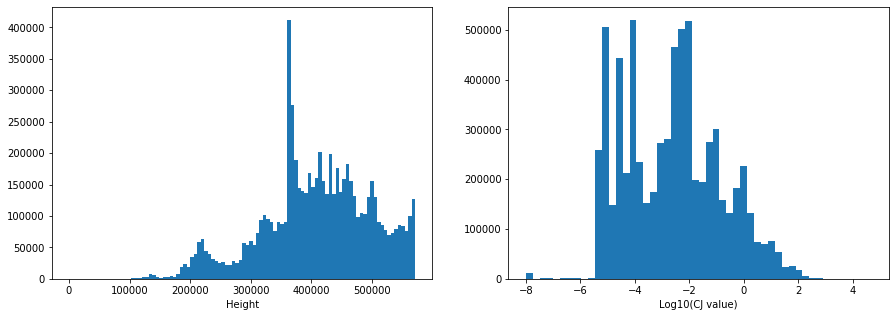

In [4]:
show_stats(cjs)

6171390 CoinJoin candidates
Most common output values
(Decimal('0.00001000'), 469418)
(Decimal('0.01000000'), 290584)
(Decimal('0.00010000'), 230162)
(Decimal('0.00020000'), 143490)
(Decimal('0.10000000'), 137383)
(Decimal('0.00100000'), 133134)
(Decimal('0.00001250'), 128377)
(Decimal('1.00000000'), 101969)
(Decimal('0.00007800'), 85536)
(Decimal('0.00500000'), 84784)
(Decimal('0.00050000'), 75306)
(Decimal('0.00200000'), 68289)
(Decimal('0.05000000'), 56373)
(Decimal('0.02000000'), 51330)
(Decimal('0.00008000'), 50449)
(Decimal('0.00009000'), 42195)
(Decimal('0.50000000'), 37720)
(Decimal('0.00030000'), 35784)
(Decimal('0.00003000'), 35391)
(Decimal('0.00006000'), 34635)


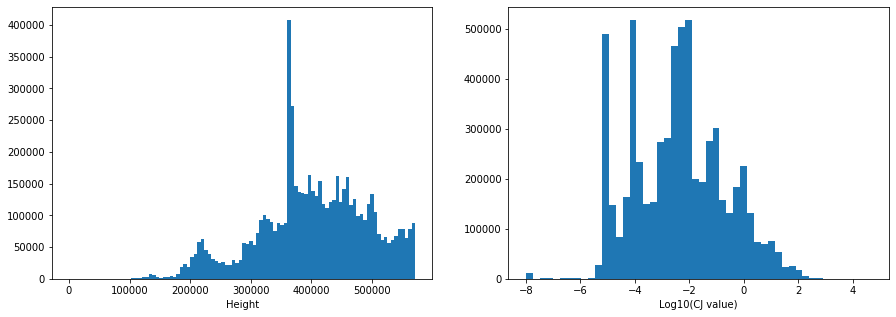

In [5]:
show_stats(cjs[cjs.op_r==0])
cjs_mod1 = cjs[cjs.op_r==0]

5735148 CoinJoin candidates
Most common output values
(Decimal('0.00001000'), 469322)
(Decimal('0.01000000'), 248208)
(Decimal('0.00010000'), 223257)
(Decimal('0.00020000'), 141702)
(Decimal('0.00001250'), 128376)
(Decimal('0.00100000'), 126319)
(Decimal('0.10000000'), 117566)
(Decimal('1.00000000'), 91623)
(Decimal('0.00007800'), 81927)
(Decimal('0.00500000'), 78694)
(Decimal('0.00050000'), 73749)
(Decimal('0.00200000'), 61247)
(Decimal('0.00008000'), 50418)
(Decimal('0.05000000'), 48329)
(Decimal('0.02000000'), 43828)
(Decimal('0.00009000'), 42188)
(Decimal('0.00030000'), 35456)
(Decimal('0.00003000'), 35366)
(Decimal('0.00006000'), 34434)
(Decimal('0.50000000'), 31045)


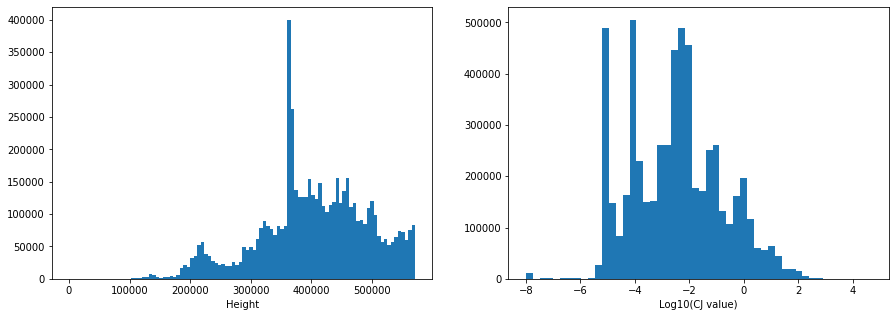

In [6]:
show_stats(cjs_mod1[cjs_mod1.n_vout >= cjs_mod1.n_vin])
cjs_mod2 = cjs_mod1[cjs_mod1.n_vout >= cjs_mod1.n_vin]

3570215 CoinJoin candidates
Most common output values
(Decimal('0.01000000'), 248208)
(Decimal('0.10000000'), 117566)
(Decimal('1.00000000'), 91623)
(Decimal('0.00500000'), 78694)
(Decimal('0.00200000'), 61247)
(Decimal('0.05000000'), 48329)
(Decimal('0.02000000'), 43828)
(Decimal('0.50000000'), 31045)
(Decimal('0.00490000'), 30068)
(Decimal('0.06980000'), 29592)
(Decimal('10.00000000'), 28668)
(Decimal('0.00480000'), 27429)
(Decimal('0.03000000'), 22256)
(Decimal('0.00300000'), 21411)
(Decimal('2.00000000'), 21277)
(Decimal('0.00470000'), 20604)
(Decimal('0.20000000'), 20559)
(Decimal('0.00530000'), 20176)
(Decimal('0.00250000'), 19748)
(Decimal('0.00240000'), 19113)


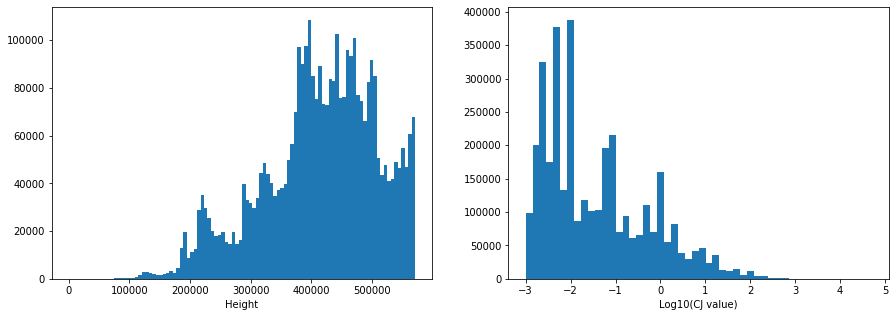

In [7]:
show_stats(cjs_mod2[cjs_mod2.cj_value > 1e-3])

In [83]:
np.mean(cjs.wasabi)

0.0

[(Decimal('0.00001000'), 464929),
 (Decimal('0.00003000'), 279207),
 (Decimal('0.01000000'), 239466),
 (Decimal('0.00010000'), 170749),
 (Decimal('0.00001250'), 128376),
 (Decimal('0.00020000'), 127848),
 (Decimal('0.10000000'), 93772),
 (Decimal('0.00007800'), 84841),
 (Decimal('0.00100000'), 65167),
 (Decimal('0.00005500'), 60825),
 (Decimal('1.00000000'), 57045),
 (Decimal('0.00500000'), 52885),
 (Decimal('0.00008000'), 42914),
 (Decimal('0.00200000'), 39596),
 (Decimal('0.02000000'), 35345),
 (Decimal('0.05000000'), 34802),
 (Decimal('0.00006000'), 31705),
 (Decimal('0.00009000'), 31078),
 (Decimal('0.06980000'), 29677),
 (Decimal('0.00490000'), 28498),
 (Decimal('0.00480000'), 26567),
 (Decimal('0.50000000'), 26005),
 (Decimal('0.00000546'), 23659),
 (Decimal('0.00000600'), 22948),
 (Decimal('0.00003500'), 21381),
 (Decimal('0.00030000'), 20303),
 (Decimal('0.00470000'), 19893),
 (Decimal('0.00530000'), 19702),
 (Decimal('0.20000000'), 19266),
 (Decimal('0.00010860'), 18666),
 (De

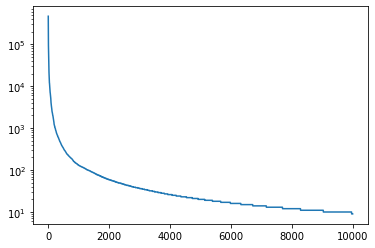

In [11]:
cj_values = Counter(cjs.cj_value)
common = cj_values.most_common()
counts = [c[1] for c in common]
semilogy(counts[:10000])
cj_values.most_common()[:100]

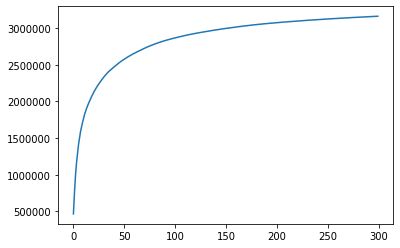

In [23]:
plot(cumsum(counts[:300]))

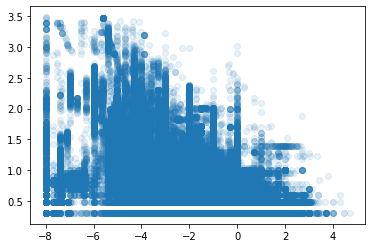

In [10]:
scatter(cjs.log_cj_value, cjs.cj_part,alpha=0.1)

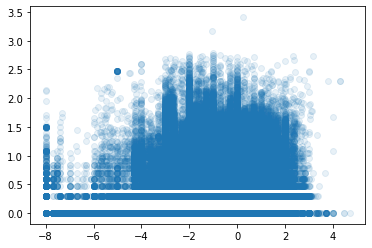

In [11]:
scatter(cjs.log_cj_value, cjs.n_vin, alpha=0.1)

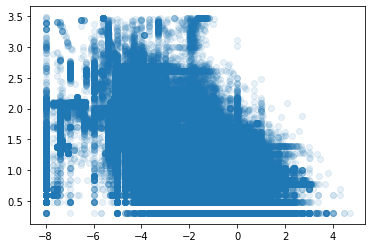

In [12]:
scatter(cjs.log_cj_value, cjs.n_vout, alpha=0.1)

In [14]:
sns.pairplot?

<Figure size 1440x1440 with 0 Axes>

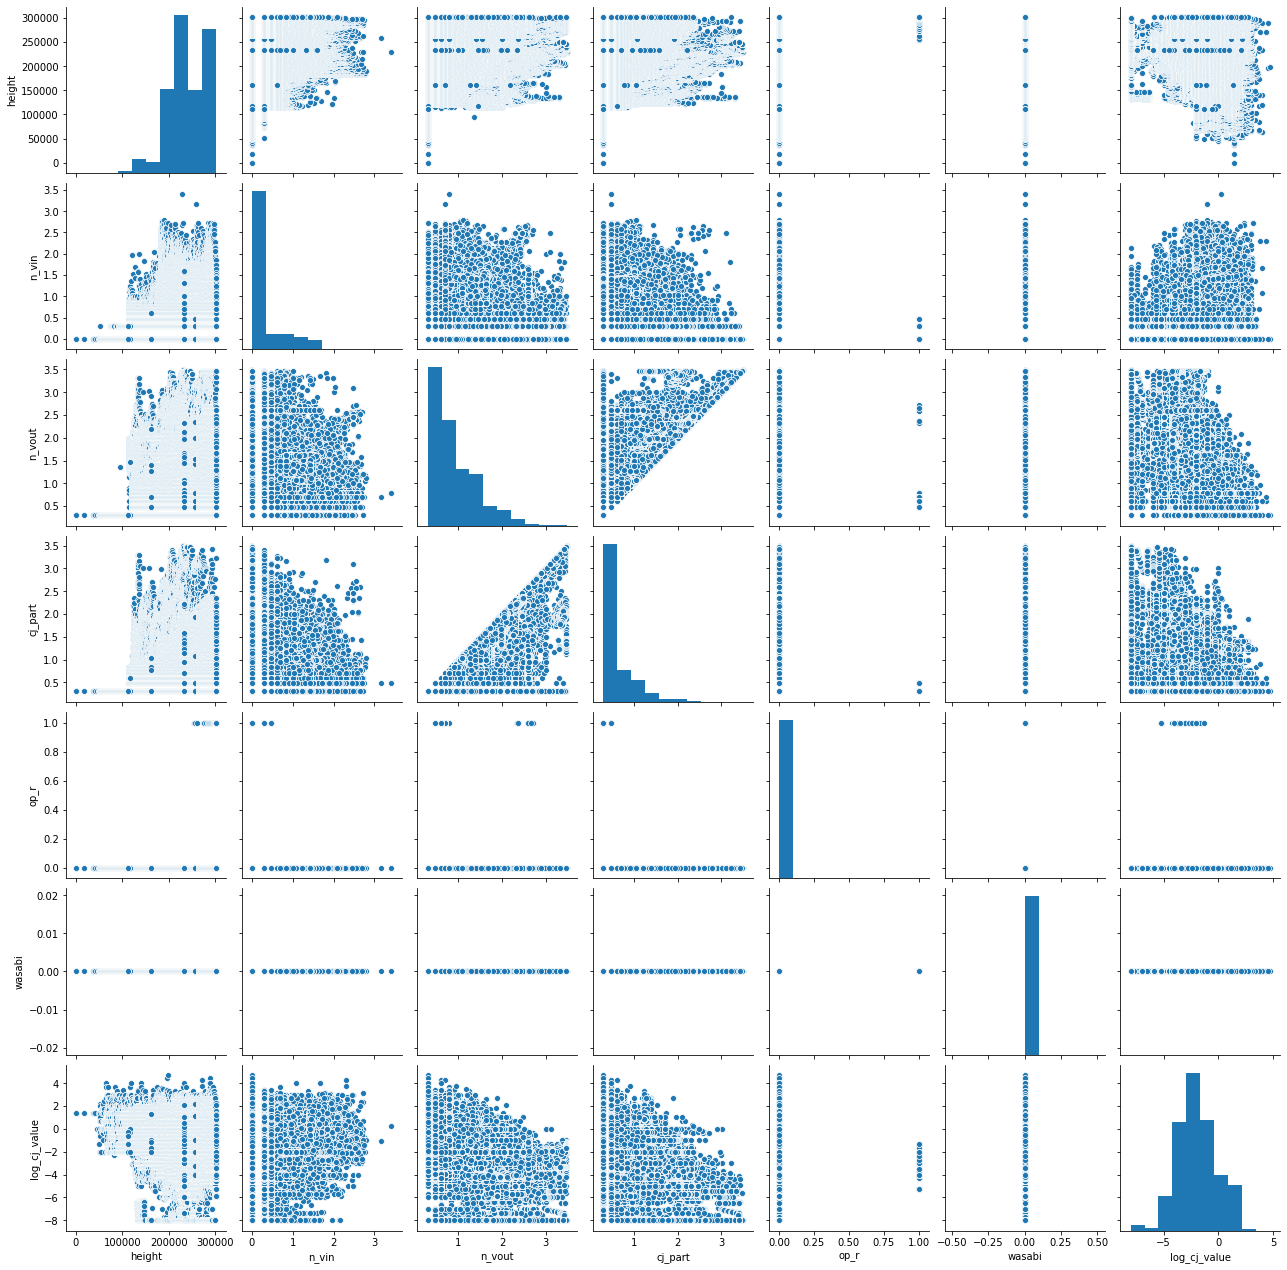

In [24]:
cjs_pairplot = cjs.drop(columns=['cj_value', 'max_out', 'min_out'])
cjs_pairplot.log_cj_value = cjs_pairplot.log_cj_value.astype(float32)
figure(figsize=(20,20))
sns.pairplot(cjs_pairplot)